USING THE CHURN DATA DATASETS, DO A PREDICTIVE ANALYSIS USING RANDOM FORESTS AND HETEROGENEOUS ENSEMBLES

Step 1: Importing necessary libraries and loading the dataset

In [220]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the insurance dataset
df = pd.read_csv('Churn_Modelling.csv')

# Preview the first 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Step 2: Exploratory Data Analysis (EDA)

In [221]:
# Check the data types of each column
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [222]:
# Check the summary statistics of the numerical variables
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [223]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

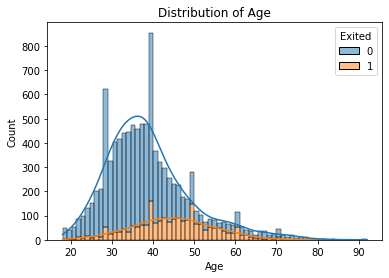

In [224]:
# Plot a histogram of the age distribution
sns.histplot(data=df, x='Age', hue='Exited', kde=True, multiple='stack')
plt.title('Distribution of Age')
plt.show()

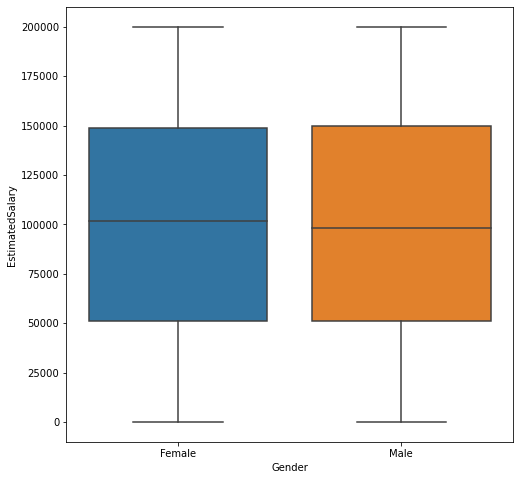

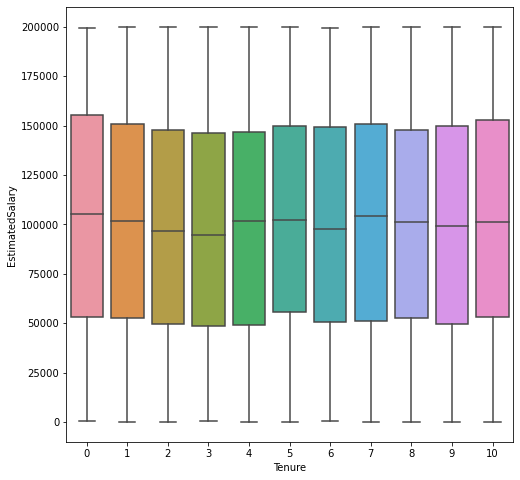

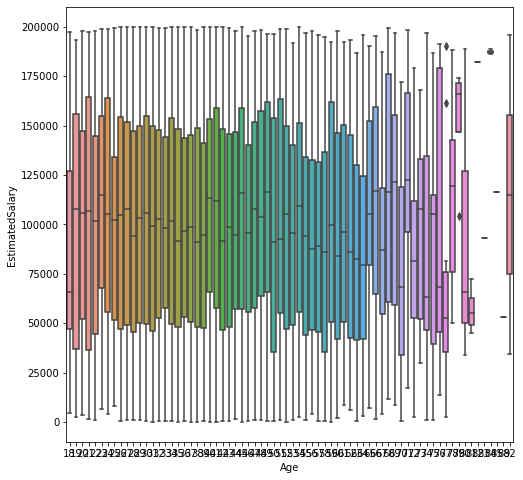

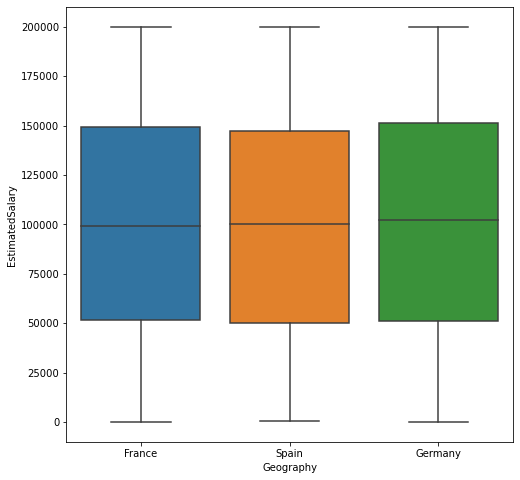

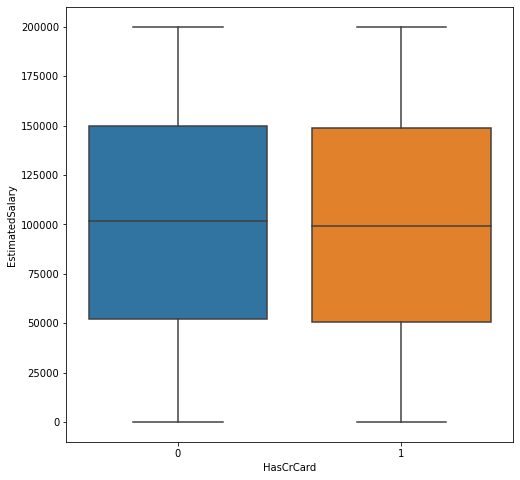

In [225]:
# Plot a box plots for the variable 'EstimatedSalary' based on the different categories of the selected columns in the list 'cols'
cols = ['Gender', 'Tenure', 'Age', 'Geography', 'HasCrCard']
for col in cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x = df[col], y = df['EstimatedSalary'])

In [226]:
df.Geography = [1 if x == 'yes' else 0 for x in df.Geography]
df.Gender = [1 if x == 'male' else 0 for x in df.Gender]
df.corr()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,NaN,NaN,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,NaN,NaN,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,NaN,NaN,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.000783,0.009497,-0.003965,NaN,NaN,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,NaN,NaN,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,NaN,NaN,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,NaN,NaN,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,NaN,NaN,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


<AxesSubplot:>

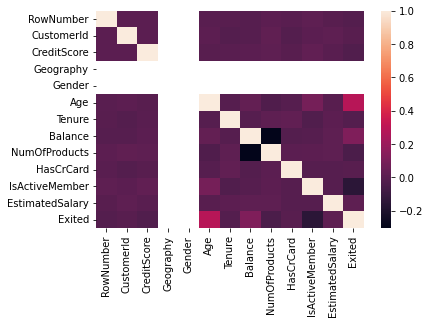

In [227]:
sns.heatmap(df.corr())

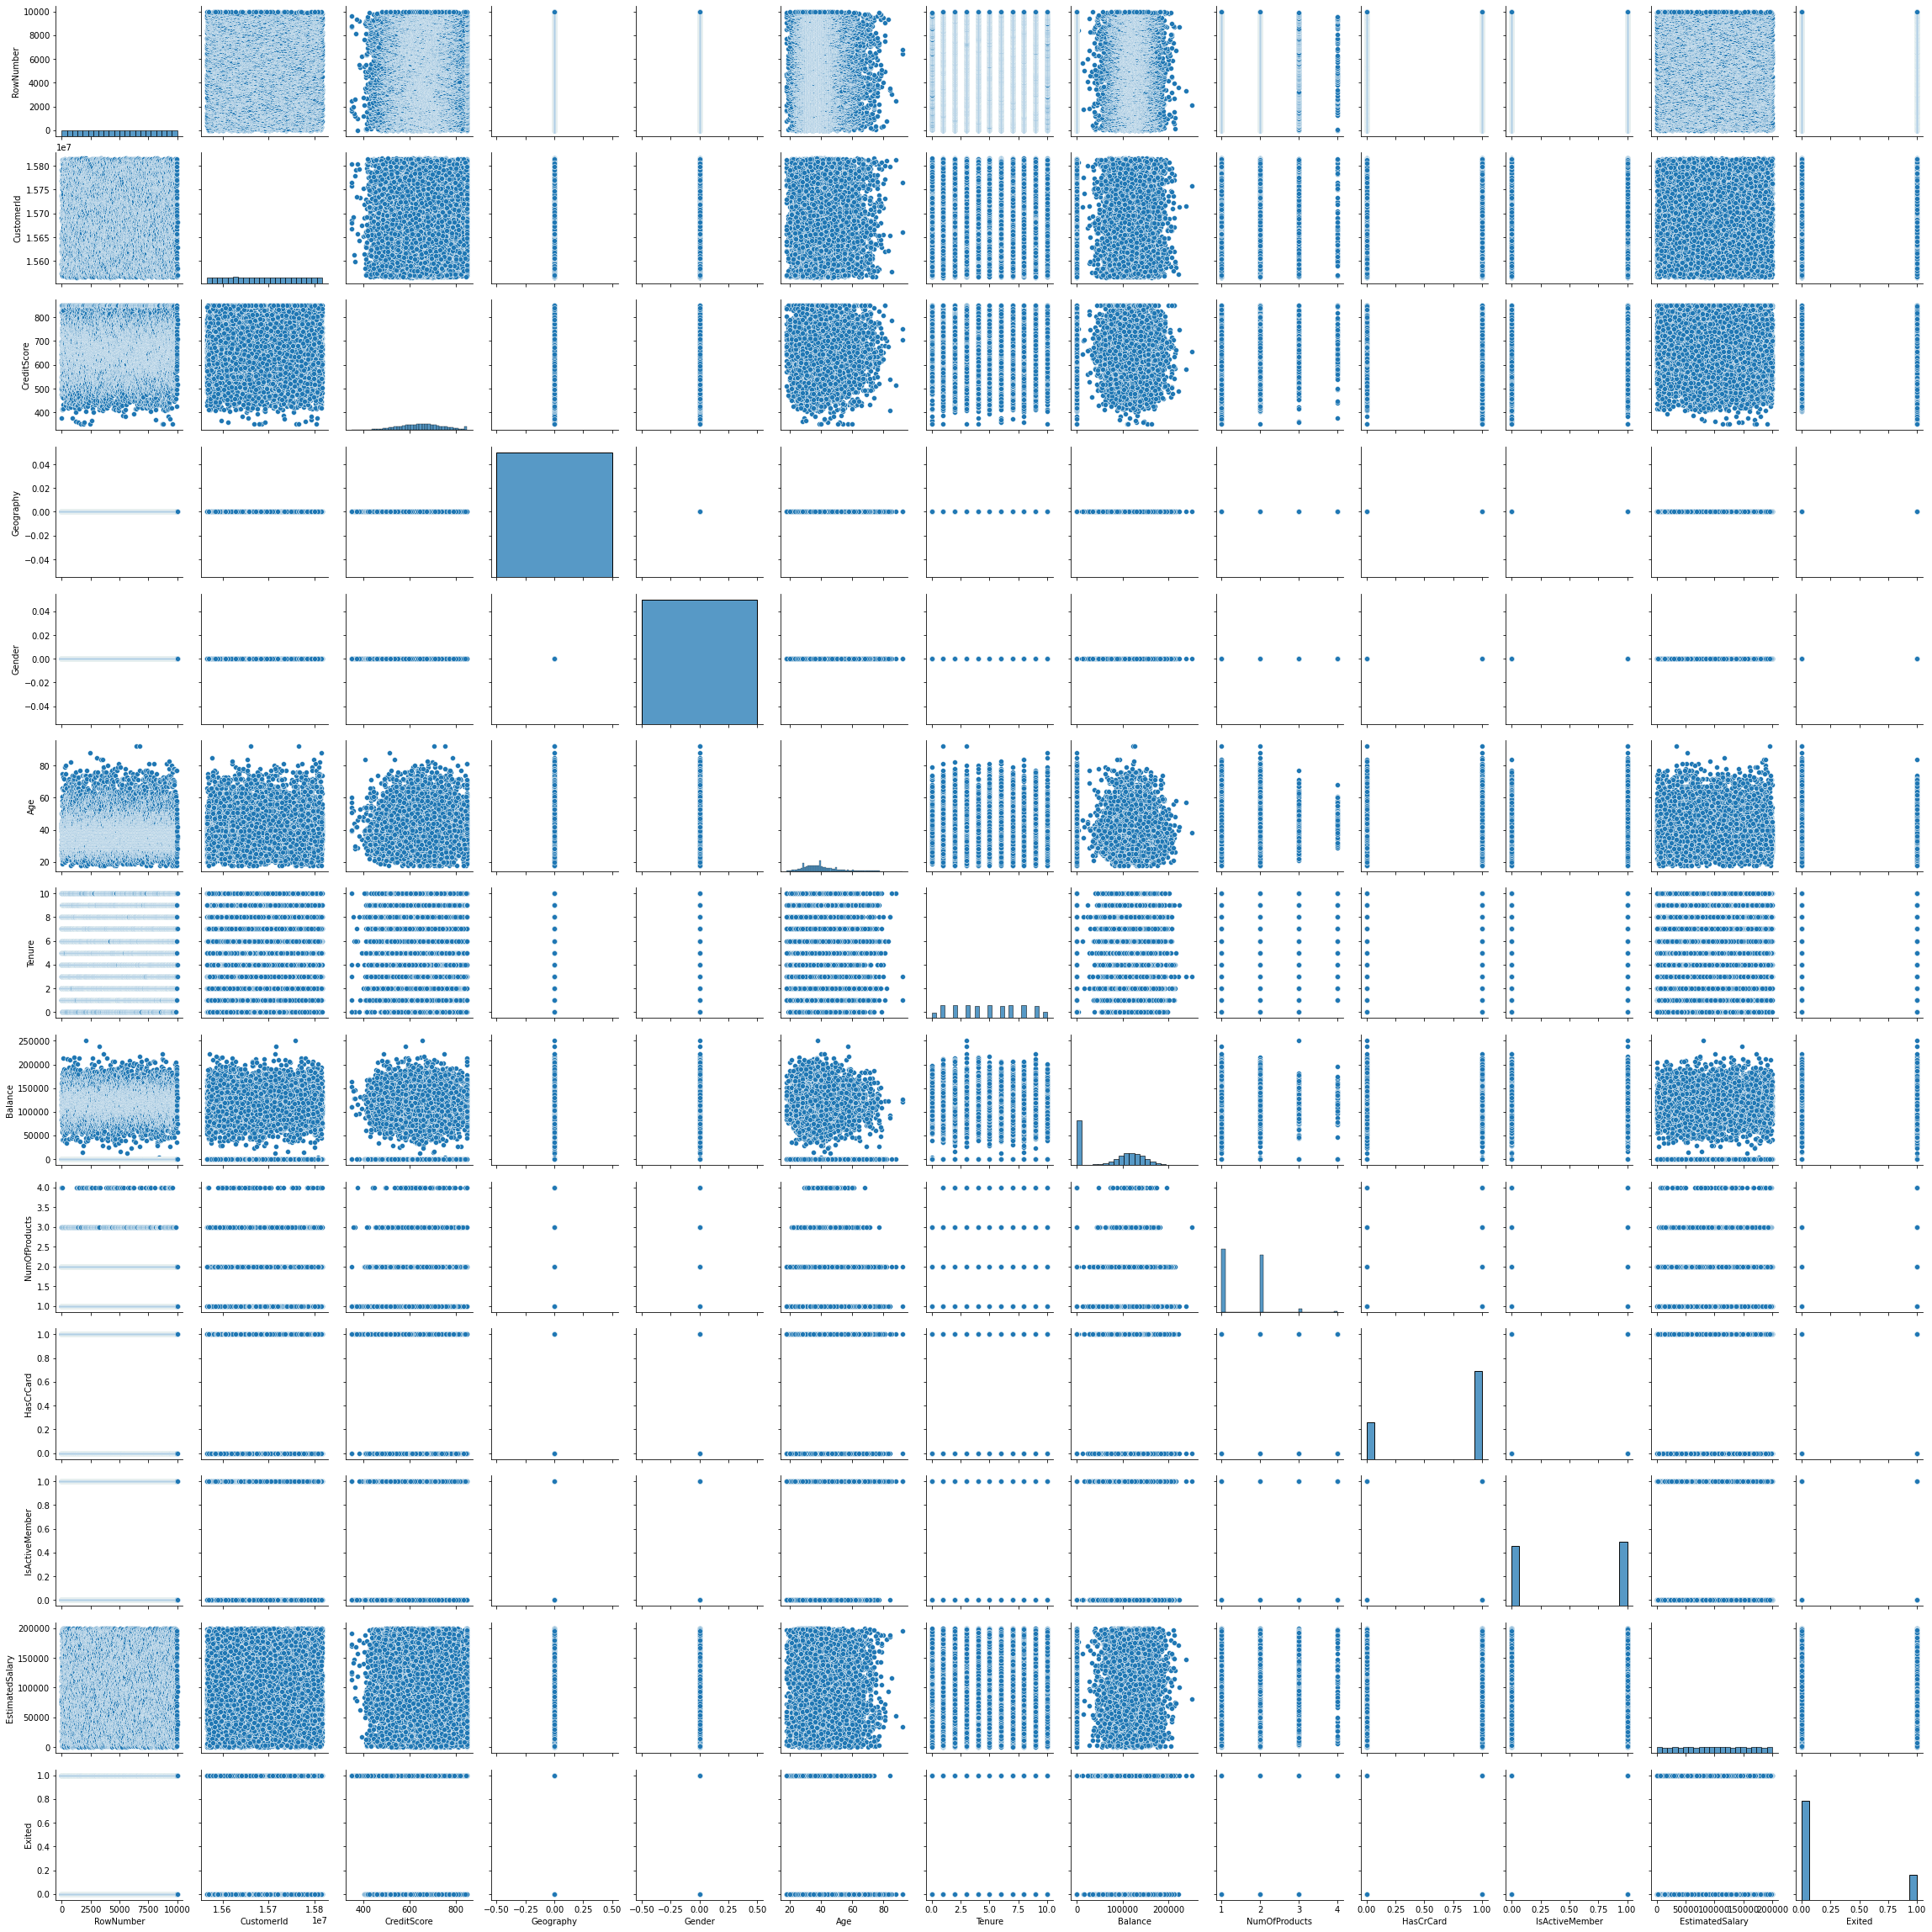

In [228]:
# Plot a pairplot to visualize pairwise relationships between the features
sns.pairplot(df)

step 3: Training the Models

In [229]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [230]:
# Select relevant features for prediction
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [231]:
# Split the data into features and target variable
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

In [232]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
# Train a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [234]:
# Predict on the test set
y_pred = model.predict(X_test)

In [235]:
# Calculate the mean squared error on the training set
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print("Random Forest Mean Squared Error: {:.2f}".format(mse))

Random Forest Mean Squared Error: 0.02


step 4: Combining the Models

In [236]:
# Load the test data
test_data = pd.read_csv('churn_modelling.csv')


In [237]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [238]:
#  Chossing features for predicting the target variable
x = df

In [239]:
# Data split on df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state=42)


In [240]:
# Create RandomForestRegressor model with max_features parameter
model = RandomForestRegressor(n_estimators=100, max_features=10, random_state=0)

In [241]:
# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [242]:
# Create a Random Forest regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [243]:
# Make predictions
y_pred = rf_reg.predict(X_test)

In [244]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", mse)

Random Forest Mean Squared Error: 0.11432525000000002


step 5:Evaluating the Ensemble

In [245]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [246]:
# Define the models
rf1 = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
rf2 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
lr = LinearRegression()

In [247]:
# Define the ensemble models
voting_regressor = VotingRegressor([('rf1', rf1), ('rf2', rf2), ('lr', lr)])
stacking_regressor = StackingRegressor([('rf1', rf1), ('rf2', rf2)], final_estimator=lr)

In [248]:
# Fit the models
rf1.fit(X_train, y_train)
rf2.fit(X_train, y_train)
lr.fit(X_train, y_train)
voting_regressor.fit(X_train, y_train)
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('rf1',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=50,
                                                     random_state=42)),
                              ('rf2',
                               RandomForestRegressor(max_depth=5,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [249]:
# Predict the test data using the models
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_voting = voting_regressor.predict(X_test)
y_pred_stacking = stacking_regressor.predict(X_test)

In [250]:
# Calculate the Mean Squared Error (MSE)
mse_rf1 = mean_squared_error(y_test, y_pred_rf1)
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_voting = mean_squared_error(y_test, y_pred_voting)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)

In [251]:
# Print the MSE for each model
print("Random Forest 1 Mean Squared Error: {:.2f}".format(mse_rf1))
print("Random Forest 2 Mean Squared Error: {:.2f}".format(mse_rf2))
print("Linear Regression Mean Squared Error: {:.2f}".format(mse_lr))
print("Voting Regressor Mean Squared Error: {:.2f}".format(mse_voting))
print("Stacking Regressor Mean Squared Error: {:.2f}".format(mse_stacking))

Random Forest 1 Mean Squared Error: 0.11
Random Forest 2 Mean Squared Error: 0.11
Linear Regression Mean Squared Error: 0.14
Voting Regressor Mean Squared Error: 0.11
Stacking Regressor Mean Squared Error: 0.11


step 6: Tuning the Ensemble

In [252]:
# Importing the required libraries for evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [253]:
# Initialize the random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [254]:
# Fit the random forest model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [255]:
# Predicting the target variable for the test data
y_pred_test = model.predict(X_test)

In [256]:
# Computing the mean squared error (MSE) on test data
mse = mean_squared_error(y_test, y_pred_test)
print("Random Forest Mean Squared Error:", mse)

Random Forest Mean Squared Error: 0.11432525000000002


In [257]:
# Computing the R-squared (R2) score on test data
r2 = r2_score(y_test, y_pred_test)
print("Random Forest R-squared Score:", r2)

Random Forest R-squared Score: 0.2759080422642034
